# Subtype prediction on the GSE16150 GEX dataset from 19 pediatric B-cell ALL samples ([Diedrich et al., 2021](https://doi.org/10.1038/s41375-021-01209-1))

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns
import joblib
import sys
sys.path.append('../Train_Predict_modules/')
from NSCmodelsV2 import *
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
path = '../test_data/GEX/'
testX =  joblib.load(path + 'gex_final.pkl')
testpheno = pd.read_csv(path + 'phenodf.csv', index_col = 'Sample SJ ID')

In [3]:
testX.shape

(19, 19774)

In [4]:
pathsep = '../ALLIUM_signatures/'

In [5]:
unique_genedf = pd.read_csv(pathsep + 'GenesSelectedNSCv2.csv')

In [6]:
unique_genedf

,Subtype,Gene ID,Gene,CHR
0,aneuploidy,ENSG00000074211,PPP2R2C,4
1,aneuploidy,ENSG00000102048,ASB9,X
2,aneuploidy,ENSG00000104177,MYEF2,15
3,aneuploidy,ENSG00000114805,PLCH1,3
4,aneuploidy,ENSG00000119535,CSF3R,1
...,...,...,...,...
420,Control,ENSG00000176890,TYMS,18
421,Control,ENSG00000183856,IQGAP3,1
422,Control,ENSG00000266074,BAHCC1,17
423,Control,ENSG00000275832,ARHGAP23,17


In [7]:
unique_genedf.Subtype.value_counts()

ETV6-group                   40
low HeH                      36
DUX4-r                       35
11q23/MLL                    32
ZNF384-r                     30
t(12;21)_vs_t(12;21)-like    30
aneuploidy                   30
PAX5 p.Pro80Arg              29
ph-group                     27
MEF2D-r                      23
Control                      22
iAMP21                       19
t(9;22)_vs_ph-like           18
PAX5alt                      15
HeH                          13
NUTM1-r                      10
t(1;19)                       9
T-ALL                         7
Name: Subtype, dtype: int64

In [8]:
finalsignatures = unique_genedf.copy()
finalsignatures.Subtype.value_counts(dropna = False)

ETV6-group                   40
low HeH                      36
DUX4-r                       35
11q23/MLL                    32
ZNF384-r                     30
t(12;21)_vs_t(12;21)-like    30
aneuploidy                   30
PAX5 p.Pro80Arg              29
ph-group                     27
MEF2D-r                      23
Control                      22
iAMP21                       19
t(9;22)_vs_ph-like           18
PAX5alt                      15
HeH                          13
NUTM1-r                      10
t(1;19)                       9
T-ALL                         7
Name: Subtype, dtype: int64

In [9]:
finalsignatures.shape

(425, 4)

In [10]:
modelpath = '../ALLIUM_models/ALLIUM_GEX/'

In [11]:
model = joblib.load(modelpath + '/model_NSCv2_gex.pkl')

In [12]:
model

{'aneuploidy': NearestCentroid(),
 'Overall_aneuploidy': NearestCentroid(),
 'ph-group': NearestCentroid(),
 't(9;22)_vs_ph-like': NearestCentroid(),
 'ETV6-group': NearestCentroid(),
 't(12;21)_vs_t(12;21)-like': NearestCentroid(),
 'T-ALL': NearestCentroid(),
 'DUX4-r': NearestCentroid(),
 'PAX5alt': NearestCentroid(),
 '11q23/MLL': NearestCentroid(),
 'ZNF384-r': NearestCentroid(),
 't(1;19)': NearestCentroid(),
 'MEF2D-r': NearestCentroid(),
 'PAX5 p.Pro80Arg': NearestCentroid(),
 'NUTM1-r': NearestCentroid(),
 'Control': NearestCentroid()}

# Predict the external validation cohort

In [13]:
sum(testX.index == testpheno.index)

19

In [14]:
testpheno['Subtypes'] = [name.split('_')[0] for name in testpheno.Subtype_name]
testpheno


,Subtype_name,Sex,Age,Cohort,Subtypes
Sample SJ ID,,,,,
SJHBBBM4X52,ETV6-RUNX1_1,Male,4.57,Total XVI,ETV6-RUNX1
SJHBBBM4JQZ,ETV6-RUNX1_2,Male,3.18,Total XVI,ETV6-RUNX1
SJHBBBM5SGJ,ETV6-RUNX1_3,Male,6.81,Total XVI,ETV6-RUNX1
SJHBBBM5TXY,ETV6-RUNX1_4,Female,4.82,Total XVI,ETV6-RUNX1
SJHBBBM2GV5,ETV6-RUNX1_5,Male,5.15,Total XVI,ETV6-RUNX1
SJHBBBM39BT,ETV6-RUNX1_6,Female,3.03,Total XVI,ETV6-RUNX1
SJHBBBM67H6,Hyperdiploid_1,Male,14.59,Total XVI,Hyperdiploid
SJHBBBM2BBR,Hyperdiploid_2,Male,4.17,Total XVI,Hyperdiploid
SJHBBBN9RBJ,Hyperdiploid_3,Male,8.32,Total XVI,Hyperdiploid


In [15]:
testpheno.Subtypes.replace(['ETV6-RUNX1', 'Hyperdiploid', 'DUX4-ERG'], ['t(12;21)', 'HeH', 'DUX4-r'], inplace = True)
testpheno

,Subtype_name,Sex,Age,Cohort,Subtypes
Sample SJ ID,,,,,
SJHBBBM4X52,ETV6-RUNX1_1,Male,4.57,Total XVI,t(12;21)
SJHBBBM4JQZ,ETV6-RUNX1_2,Male,3.18,Total XVI,t(12;21)
SJHBBBM5SGJ,ETV6-RUNX1_3,Male,6.81,Total XVI,t(12;21)
SJHBBBM5TXY,ETV6-RUNX1_4,Female,4.82,Total XVI,t(12;21)
SJHBBBM2GV5,ETV6-RUNX1_5,Male,5.15,Total XVI,t(12;21)
SJHBBBM39BT,ETV6-RUNX1_6,Female,3.03,Total XVI,t(12;21)
SJHBBBM67H6,Hyperdiploid_1,Male,14.59,Total XVI,HeH
SJHBBBM2BBR,Hyperdiploid_2,Male,4.17,Total XVI,HeH
SJHBBBN9RBJ,Hyperdiploid_3,Male,8.32,Total XVI,HeH


# GEX predictions work with signature_mode as default (all), meaning that each classifier using all selected signatures

In [16]:
valgen = predictionsNSC(model = model, discoverydf = testX, discoverypheno = testpheno, 
                        clinicaldatalist = ['Subtypes'],
                       unique_genedf = finalsignatures, subtypecol = 'Subtype', 
                        ids = 'Gene ID', name = 'GEX_subtype', datatype = 'GEX')

Starting with subtype group aneuploidy
-------Start multiclass approach-----------
Starting with subtype group ph-group
Starting with subtype group ETV6-group
-------Start one vs one approach-----------
---------------t(12;21) vs t(12;21)-like---------------
Starting with subtype group T-ALL
Starting with subtype group DUX4-r
Starting with subtype group PAX5alt
Starting with subtype group 11q23/MLL
Starting with subtype group ZNF384-r
Starting with subtype group t(1;19)
Starting with subtype group MEF2D-r
Starting with subtype group PAX5 p.Pro80Arg
Starting with subtype group NUTM1-r
Starting with subtype group Control


In [17]:
valgen

,Subtypes,aneuploidy.classifier.proba,HeH.classifier.proba,low HeH.classifier.proba,iAMP21.classifier.proba,ph-group.classifier.proba,t(9;22).classifier.proba,ph-like.classifier.proba,ETV6-group.classifier.proba,t(12;21).classifier.proba,...,Control.classifier.proba,#predicted.classes,GEX_subtype,Subtype detailed_v1,Probability detailed_v1,GEX_subtype_groups,#classes.updated,GEX_probability_V2,GEX_subtype_V2,GEX_subtype_comments
Sample SJ ID,,,,,,,,,,,,,,,,,,,,,
SJHBBBM4X52,t(12;21),0.016694,NaN,NaN,NaN,0.006072,NaN,NaN,1.000000e+00,0.947408,...,5.441645e-09,1,ETV6-group,ETV6-group,1.0,ETV6-group,1,0.9474,t(12;21),Passed control
SJHBBBM4JQZ,t(12;21),0.049971,NaN,NaN,NaN,0.008241,NaN,NaN,1.000000e+00,0.874213,...,5.833646e-09,1,ETV6-group,ETV6-group,1.0,ETV6-group,1,0.8742,t(12;21),Passed control
SJHBBBM5SGJ,t(12;21),0.012810,NaN,NaN,NaN,0.005501,NaN,NaN,9.999983e-01,0.950264,...,7.143709e-08,1,ETV6-group,ETV6-group,1.0,ETV6-group,1,0.9503,t(12;21),Passed control
SJHBBBM5TXY,t(12;21),0.066131,NaN,NaN,NaN,0.001190,NaN,NaN,9.999999e-01,0.969205,...,1.826689e-09,1,ETV6-group,ETV6-group,1.0,ETV6-group,1,0.9692,t(12;21),Passed control
SJHBBBM2GV5,t(12;21),0.024864,NaN,NaN,NaN,0.008208,NaN,NaN,1.000000e+00,0.948191,...,4.333854e-09,1,ETV6-group,ETV6-group,1.0,ETV6-group,1,0.9482,t(12;21),Passed control
SJHBBBM39BT,t(12;21),0.048989,NaN,NaN,NaN,0.007359,NaN,NaN,1.000000e+00,0.936972,...,5.074201e-09,1,ETV6-group,ETV6-group,1.0,ETV6-group,1,0.937,t(12;21),Passed control
SJHBBBM67H6,HeH,0.999990,0.927857,0.034914,0.037229,0.006746,NaN,NaN,2.185300e-05,NaN,...,3.278898e-10,1,aneuploidy,aneuploidy,1.0,aneuploidy,1,0.9279,HeH,Passed control
SJHBBBM2BBR,HeH,0.999980,0.987010,0.003827,0.009163,0.011410,NaN,NaN,4.493238e-06,NaN,...,2.625252e-09,1,aneuploidy,aneuploidy,1.0,aneuploidy,1,0.987,HeH,Passed control
SJHBBBN9RBJ,HeH,0.999684,0.875687,0.006084,0.118228,0.010998,NaN,NaN,2.368673e-06,NaN,...,4.280366e-09,2,multiclass,"aneuploidy, PAX5alt","0.9997, 0.5029",aneuploidy,1,0.8757,HeH,Passed control


In [18]:
sum(valgen.GEX_subtype_V2 == testpheno.Subtypes)

19

In [19]:
multicases = valgen[(valgen['GEX_subtype'] == 'multiclass')]
print(multicases.shape)
print(sum(multicases['Subtypes'] == multicases['GEX_subtype_V2']))

(1, 30)
1


In [20]:
valgen.to_csv('../outputs/GEX_GEO_predictions.csv')

# Construct confusion matrix for the samples of known subtype (n = 19)

In [21]:
testdf = valgen.copy()

In [22]:
subs = set(testdf.GEX_subtype_V2.value_counts().index).union(testdf.Subtypes.value_counts().index)
subs

{'DUX4-r', 'HeH', 't(12;21)'}

In [23]:
subtypeord = joblib.load('sub_colors.pkl')
subtypeord2 = subtypeord.copy()
for s in subtypeord.keys():
    if s not in subs:
        del subtypeord2[s]

subtypeorder = list(subtypeord2.keys())
subtypeorder

['HeH', 't(12;21)', 'DUX4-r']

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
corrects = pd.DataFrame(testdf[testdf.Subtypes == testdf.GEX_subtype_V2].Subtypes.value_counts())
corrects.rename(columns = {'Subtypes': 'correct_preds'}, inplace = True)
corrects['id'] = corrects.index
corrects

,correct_preds,id
HeH,11,HeH
t(12;21),6,t(12;21)
DUX4-r,2,DUX4-r


In [26]:
allsubs =  pd.DataFrame(testdf.Subtypes.value_counts())
allsubs.rename(columns = {'Subtypes': 'all_counts'}, inplace = True)
allsubs['id'] = allsubs.index
allsubs

,all_counts,id
HeH,11,HeH
t(12;21),6,t(12;21)
DUX4-r,2,DUX4-r


In [27]:
finalcounts = allsubs.merge(corrects, how = 'outer')
finalcounts.set_index('id', inplace = True)
finalcounts

,all_counts,correct_preds
id,,
HeH,11,11
t(12;21),6,6
DUX4-r,2,2


In [28]:
finalcounts = finalcounts.reindex(subtypeorder)

finalcounts

,all_counts,correct_preds
id,,
HeH,11,11
t(12;21),6,6
DUX4-r,2,2


In [29]:
finalcounts['props'] =  round(finalcounts.correct_preds/finalcounts.all_counts,2) * 100

In [30]:
finalcounts.fillna(0, inplace = True)
finalcounts

,all_counts,correct_preds,props
id,,,
HeH,11,11,100.0
t(12;21),6,6,100.0
DUX4-r,2,2,100.0


In [31]:
newnames = ['HeH',
 'ETV6::RUNX1',
 'DUX4-r']

In [32]:
finalcounts['Subtype_renamed'] =  newnames
finalcounts

,all_counts,correct_preds,props,Subtype_renamed
id,,,,
HeH,11,11,100.0,HeH
t(12;21),6,6,100.0,ETV6::RUNX1
DUX4-r,2,2,100.0,DUX4-r


In [33]:
ylabels = [l + ': ' + str(int(pr)) + '%' for l, pr in zip(finalcounts.Subtype_renamed, finalcounts.props)]
#ylabels.append('no_class')
ylabels

['HeH: 100%', 'ETV6::RUNX1: 100%', 'DUX4-r: 100%']

In [34]:
sum(testdf.Subtypes == testdf.GEX_subtype_V2)

19

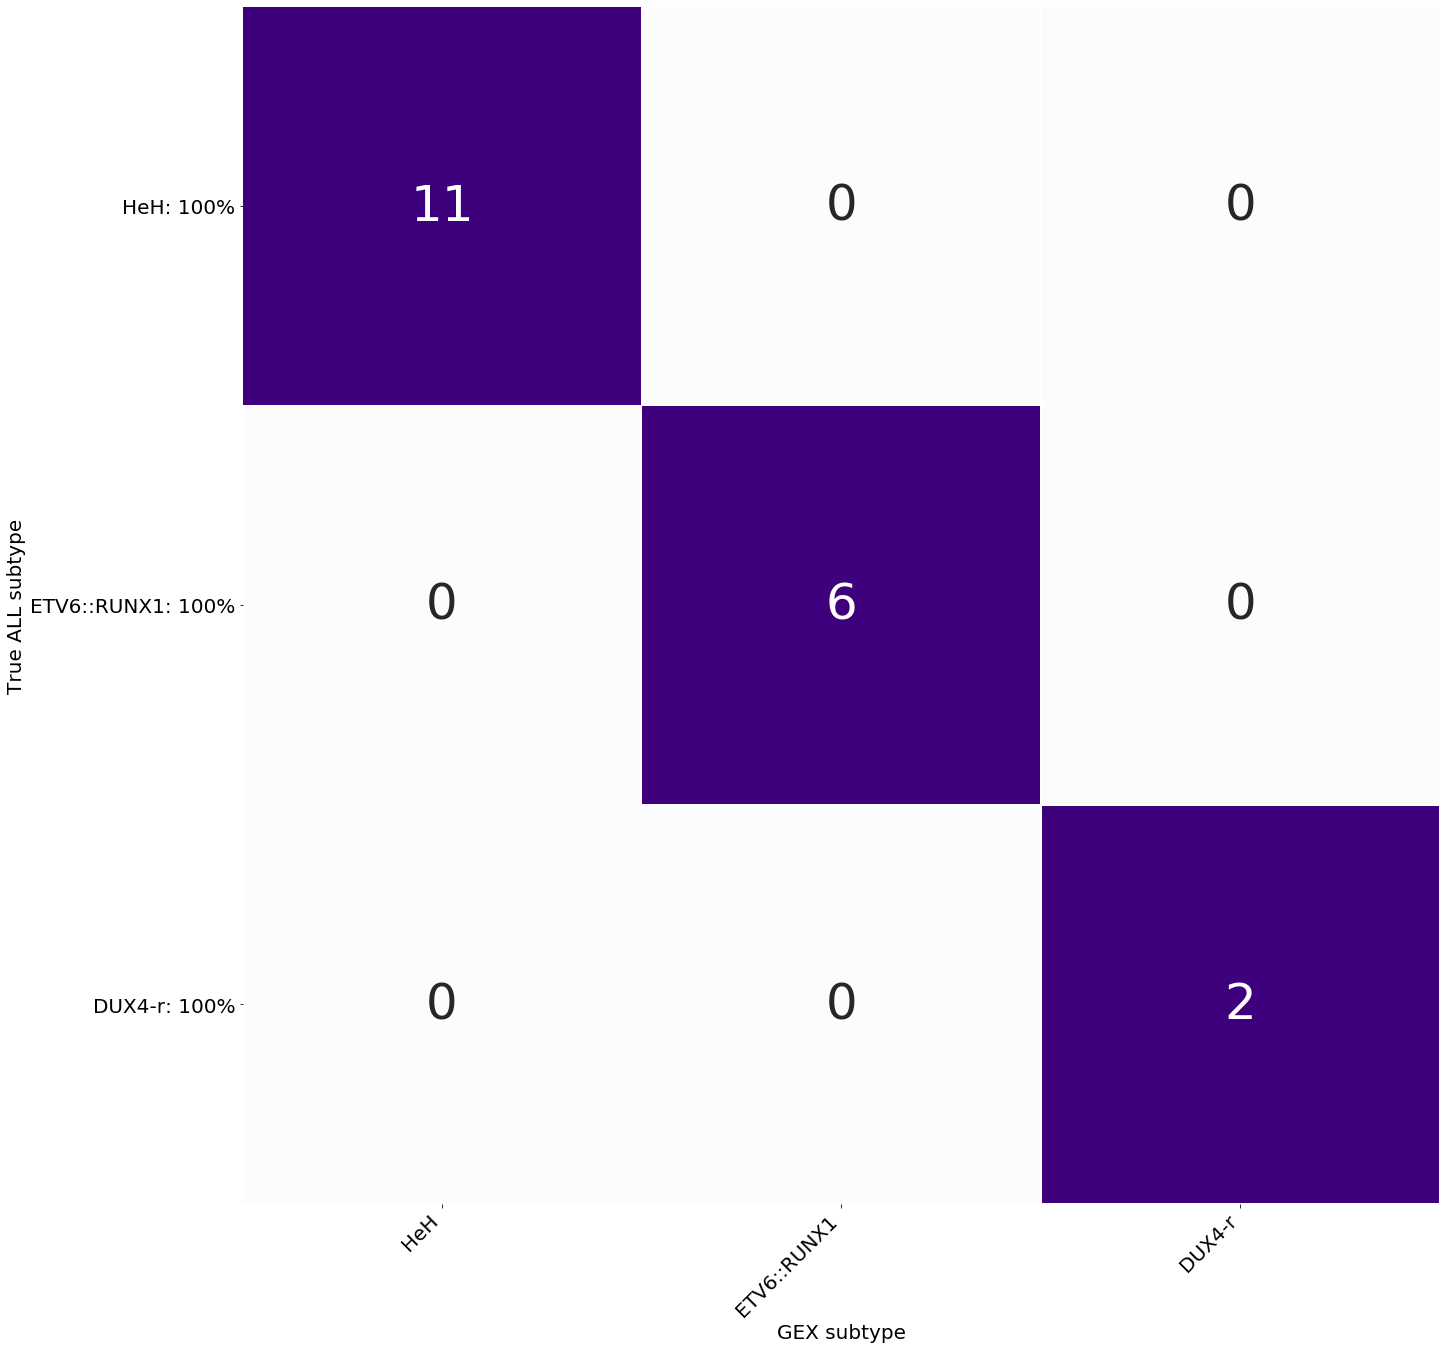

In [35]:
classes = subtypeorder.copy()
#classes.append('no_class')
cm = confusion_matrix(testdf.Subtypes, testdf.GEX_subtype_V2, labels = classes)
cm_norm = confusion_matrix(testdf.Subtypes, testdf.GEX_subtype_V2, labels = classes, normalize = 'true')
labels = newnames
hor, ver = cm.shape
xticks = [float(h)+0.5 for h in list(range(hor))]
yticks = [float(v)+0.5 for v in list(range(ver))]
plt.figure(figsize = (20,20))
sns.heatmap(cm_norm, annot=cm, linewidths=.5, square = True, cmap = 'Purples',  annot_kws = {'fontsize' : 50}, fmt = 'g', cbar = False)
plt.ylabel('True ALL subtype', fontsize = 20)
plt.xlabel('GEX subtype', fontsize = 20)
plt.xticks(xticks, labels[:hor], rotation = 45, fontsize = 20, ha='right')
plt.yticks(yticks, ylabels, rotation = 0, fontsize = 20)
plt.tight_layout()
plt.show()